# <center><b>**Autism _Prediction_Model Building**<center><b>

---
# **Table of Contents**
---
**1.** [**Installing & Importing Libraries**](#Section1)<br>
**2.** [**Data Acquisition**](#Section2)<br>
**3.** [**Feature Scaling**](#Section3)<br>
**4.** [**Model Development & Evaluation**](#Section4)<br>

   - **4.1** [**Data Preparation**](#Section4.1)<br>
   - **4.2** [**LogisticRegression**](#Section4.2)<br>
   - **4.3** [**RandomForest Classifier**](#Section4.3)<br>
   - **4.4** [**DecisionTree Classifier**](#Section4.4)<br>
   - **4.5** [**Navie Bayes**](#Section4.5)<br>
   - **4.6** [**Ada Boosting**](#Section4.6)<br>
   - **4.7** [**XG Boost Classifier**](#Section4.7)<br>
   - **4.8** [**Gradient Bosst Classifier**](#Section4.8)<br>

**5** [**Hyperparameter Tuning**](#Section5)<br>
   
   - **5.1** [**RandomizedSearchCV with RandomforestClassifier**](#Section5.1)<br>
   - **5.2** [**GridSearchCV with DecisionTree Classifier**](#Section5.2)<br>

**6** [**Tune Model With Cross Validation**](#Section6)<br>
  - **6.1** [**LogisticRegression**](#Section6.1)<br>
  - **6.2** [**Ada Boosting**](#Section6.2)<br>
  - **6.3** [**XG Boost Classifier**](#Section6.3)<br>
  - **6.4** [**Gradient Bosst Classifier**](#Section6.4)<br>

**7** [**Selecting Best Model**](#Section7)<br>


<a name = Section1></a>
### **1. Installing & Importing Libraries**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 

from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,plot_confusion_matrix,roc_curve,precision_score,recall_score
from sklearn.metrics import ConfusionMatrixDisplay ,precision_recall_curve,plot_roc_curve
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore") 

<a name = Section2></a>
### **2. Data Acquisition**

In [2]:
df = pd.read_csv('/content/data_csv.csv')
df.head(2)

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes


In [3]:
df.columns

Index(['CASE_NO_PATIENT'S', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CASE_NO_PATIENT'S                                   1985 non-null   int64  
 1   A1                                                  1985 non-null   int64  
 2   A2                                                  1985 non-null   int64  
 3   A3                                                  1985 non-null   int64  
 4   A4                                                  1985 non-null   int64  
 5   A5                                                  1985 non-null   int64  
 6   A6                                                  1985 non-null   int64  
 7   A7                                                  1985 non-null   int64  
 8   A8                                                  1985 non-null   int64  
 9

In [5]:
df2=df.copy()

In [6]:
df = df[df['Age_Years'] <13]

In [7]:
df.dropna(axis=0, how='any',inplace=True)

In [8]:
df.shape

(1169, 28)

**Crosschecking Qchat column for false scoring**

In [9]:
df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8','A9', 'A10_Autism_Spectrum_Quotient','Qchat_10_Score']].tail(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Qchat_10_Score
1976,0,0,0,0,0,0,0,0,0,1,6.0
1978,0,0,0,0,0,0,0,0,0,1,6.0
1980,0,0,0,0,0,0,0,0,0,1,6.0
1982,0,0,0,0,0,0,0,0,0,1,6.0
1984,0,0,0,0,0,0,0,0,0,1,6.0


In [10]:
# to check the perfectness of scoring in Qchat column , added column with sum of all the columns(A1 to A10)
df['new_Qchat_10_score'] = df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8','A9', 'A10_Autism_Spectrum_Quotient']].sum(axis =1)

In [11]:
df[['Qchat_10_Score','new_Qchat_10_score']].value_counts().sort_index()

Qchat_10_Score  new_Qchat_10_score
0.0             0                      35
1.0             0                     103
                1                      66
                9                       1
2.0             1                      32
                2                      60
3.0             0                     100
                3                      68
4.0             0                       2
                4                      76
5.0             0                      32
                5                      75
6.0             0                       1
                1                     177
                6                      64
7.0             0                       2
                7                      88
8.0             0                       1
                8                      60
9.0             0                       6
                9                      53
10.0            0                      16
                9                       6

In [12]:
df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8','A9', 'A10_Autism_Spectrum_Quotient','Qchat_10_Score','new_Qchat_10_score']]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Qchat_10_Score,new_Qchat_10_score
0,0,0,0,0,0,0,1,1,0,1,3.0,3
1,1,1,0,0,0,1,1,0,0,0,4.0,4
2,1,0,0,0,0,0,1,1,0,1,4.0,4
3,1,1,1,1,1,1,1,1,1,1,10.0,10
4,1,1,0,1,1,1,1,1,1,1,9.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...
1976,0,0,0,0,0,0,0,0,0,1,6.0,1
1978,0,0,0,0,0,0,0,0,0,1,6.0,1
1980,0,0,0,0,0,0,0,0,0,1,6.0,1
1982,0,0,0,0,0,0,0,0,0,1,6.0,1


In [13]:
df[(df['Qchat_10_Score'] == 0) | (df['new_Qchat_10_score']== 0)].groupby(['Qchat_10_Score','new_Qchat_10_score'])["CASE_NO_PATIENT'S"].count()

Qchat_10_Score  new_Qchat_10_score
0.0             0                      35
1.0             0                     103
3.0             0                     100
4.0             0                       2
5.0             0                      32
6.0             0                       1
7.0             0                       2
8.0             0                       1
9.0             0                       6
10.0            0                      16
Name: CASE_NO_PATIENT'S, dtype: int64

**We can see from above result that in Qchat score column false scoring was recorded and also corresponding A1 to A10 column have recorded as zero. We need to drop all these rows for better model.**

In [15]:
df= df[df['new_Qchat_10_score']!= 0]

In [16]:
df['ASD_traits'].value_counts()

Yes    519
No     352
Name: ASD_traits, dtype: int64

In [17]:
df['ASD_traits'].value_counts()/np.float(len(df))

Yes    0.595867
No     0.404133
Name: ASD_traits, dtype: float64

In [18]:
#Intialize empty list for categorical features and their length
cat_features = []
label_len = []

# Identify categorical features
for i in df.columns:
  if (df[i].dtype == object):
    cat_features.append(i)

# Identify labels length per leature
for i in cat_features:
  label_len.append(len(df[i].unique()))

# Display total categorical features
print('Total Categorical Features:', len(cat_features))

# Create and show categorical feature frame
cat_frame = pd.DataFrame(data = {'Length': label_len}, index=cat_features)
cat_frame

Total Categorical Features: 13


,Length
Speech Delay/Language Disorder,2
Learning disorder,2
Genetic_Disorders,2
Depression,2
Global developmental delay/intellectual disability,2
Social/Behavioural Issues,2
Anxiety_disorder,2
Sex,2
Ethnicity,16
Jaundice,2


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
  if df[i].dtype =='object':
    df[i] = le.fit_transform(df[i])

In [20]:
df.drop(['Qchat_10_Score','new_Qchat_10_score'],axis = 1, inplace = True)

<a name = Section3></a>
### **3.Feature scaling and selection** 

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(['ASD_traits'],axis =1))

In [22]:
x = pd.DataFrame(data=X_scaled, columns=df.drop(['ASD_traits'],axis =1).columns)
y= df['ASD_traits']

In [23]:
from sklearn.feature_selection import SelectFromModel
from yellowbrick.model_selection import FeatureImportances 
from sklearn.ensemble import RandomForestClassifier
selector = SelectFromModel(RandomForestClassifier(n_estimators = 10, random_state = 42))
selector.fit(x, y)

# Extracting list of important features
selected_feat = x.columns[(selector.get_support())].tolist()

# Show total number of important features extracted by the model
print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)

Total Features Selected are 8
Threshold set by Model: 0.04
Important Features: ["CASE_NO_PATIENT'S", 'A2', 'A4', 'A5', 'A6', 'A7', 'A9', 'Ethnicity']


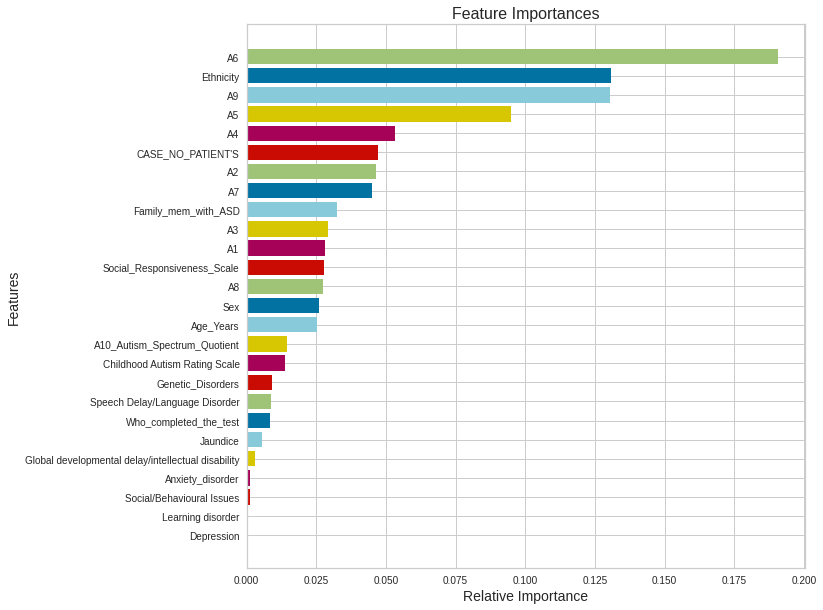

In [24]:
figure = plt.figure(figsize=[10,10])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative=False)
viz.fit(x, y)

plt.xlabel('Relative Importance', size=14)
plt.ylabel('Features', size=14)
plt.title(label='Feature Importances', size=16)
plt.show()

<a name = Section4></a>
# **4. Model Development & Evaluation**


- In this section, we will develop all possible models and compare the performance.

- For estimating the **performance** of the **model** we will be using **accuracy** as a **metric**, as data is balanced Dataset.

- Considering the complexity of data, we can run a **loop** over multiple **classifiers** and estimate the accuracy of the model.



<a name = Section4.1></a>
### **4.1. Data Preparation**

In [25]:
def model_eval(actual,predicted):
    acc_score = accuracy_score(actual , predicted)
    class_report = classification_report(actual , predicted)
    print('The accuracy of the model is : ' ,acc_score)
    print(confusion_matrix(actual,predicted))
    print(class_report)
    

In [26]:
def confus_matrix(df):
    y_train_pred_count = df.predict(x_train)
    y_test_pred_count = df.predict(x_test)

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
    plot_confusion_matrix(estimator=df, X=x_train, y_true=y_train, values_format='.7g', cmap='YlGnBu', ax=ax1)
    plot_confusion_matrix(estimator=df, X=x_test, y_true=y_test, values_format='.7g', cmap='YlGnBu', ax=ax2)
    ax1.set_title(label='Train Data', size=14)
    ax2.set_title(label='Test Data', size=14)
    ax1.grid(b=False)
    ax2.grid(b=False)
    plt.suptitle(t='Confusion Matrix', size=16)
    plt.show()

**Now we will split our data in training and testing part for further development**

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=365,stratify = y )

In [28]:
print('Training Data Shape:', x_train.shape, y_train.shape)
print('Testing Data Shape:', x_test.shape, y_test.shape)

Training Data Shape: (696, 26) (696,)
Testing Data Shape: (175, 26) (175,)


<a name = Section4.2></a>
### **4.2. Logistic Regression**

In [29]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_lr_train_pred = logreg.predict(x_train)
y_lr_test_pred = logreg.predict(x_test)

In [30]:
model_eval(y_train,y_lr_train_pred)

The accuracy of the model is :  0.9971264367816092
[[281   0]
 [  2 413]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       281
           1       1.00      1.00      1.00       415

    accuracy                           1.00       696
   macro avg       1.00      1.00      1.00       696
weighted avg       1.00      1.00      1.00       696



In [31]:
model_eval(y_test,y_lr_test_pred)

The accuracy of the model is :  0.9828571428571429
[[ 68   3]
 [  0 104]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        71
           1       0.97      1.00      0.99       104

    accuracy                           0.98       175
   macro avg       0.99      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175



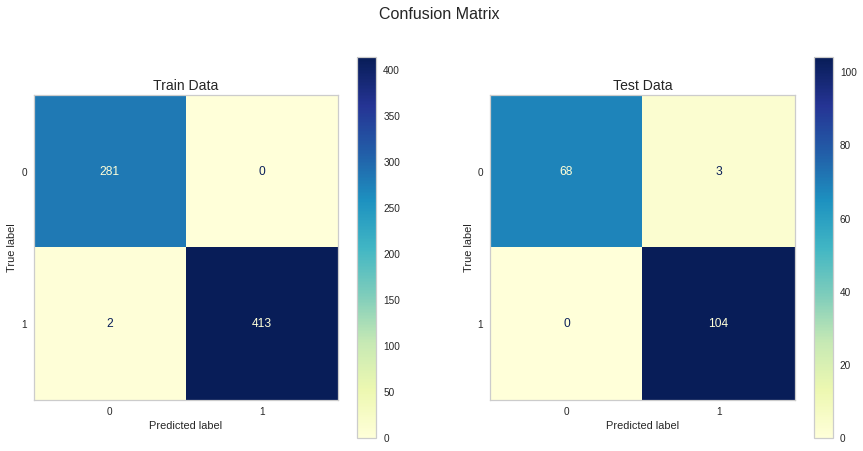

In [32]:
confus_matrix(logreg)

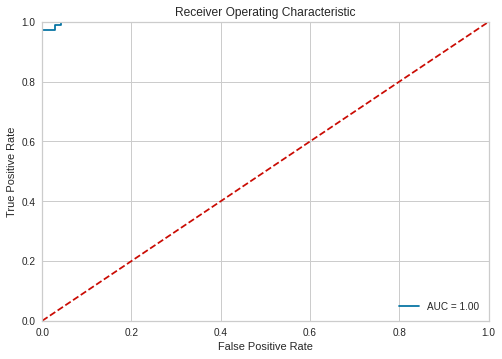

In [33]:
from sklearn import metrics

probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a name = Section4.3></a>
### **4.3. RandomForest Classifier**

In [34]:
rf = RandomForestClassifier(n_estimators=100,max_depth=7,n_jobs=-1)
rf.fit(x_train,y_train)
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [35]:
model_eval(y_train,y_rf_train_pred)

The accuracy of the model is :  0.9971264367816092
[[279   2]
 [  0 415]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       281
           1       1.00      1.00      1.00       415

    accuracy                           1.00       696
   macro avg       1.00      1.00      1.00       696
weighted avg       1.00      1.00      1.00       696



In [36]:
model_eval(y_test,y_rf_test_pred)

The accuracy of the model is :  0.9657142857142857
[[ 66   5]
 [  1 103]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        71
           1       0.95      0.99      0.97       104

    accuracy                           0.97       175
   macro avg       0.97      0.96      0.96       175
weighted avg       0.97      0.97      0.97       175



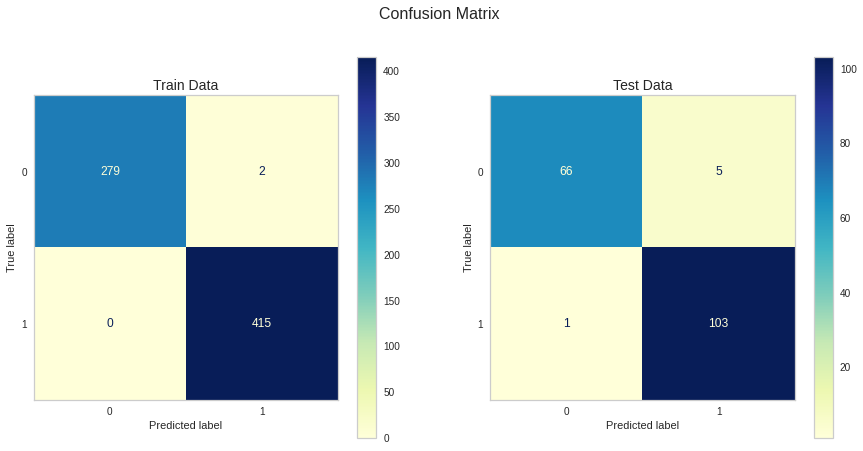

In [37]:
confus_matrix(rf)

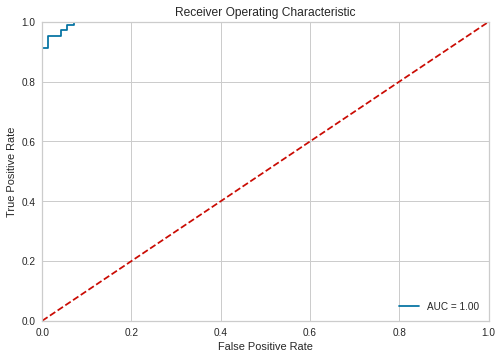

In [38]:
from sklearn import metrics

probs = rf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a name = Section4.4></a>
### **4.4. Decision Tree Classifier**

In [39]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
preds_dtree_train = dtree.predict(x_train)
preds_dtree_test = dtree.predict(x_test)

In [40]:
model_eval(y_train,preds_dtree_train)

The accuracy of the model is :  1.0
[[281   0]
 [  0 415]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       281
           1       1.00      1.00      1.00       415

    accuracy                           1.00       696
   macro avg       1.00      1.00      1.00       696
weighted avg       1.00      1.00      1.00       696



In [41]:
model_eval(y_test,preds_dtree_test)

The accuracy of the model is :  0.9085714285714286
[[61 10]
 [ 6 98]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        71
           1       0.91      0.94      0.92       104

    accuracy                           0.91       175
   macro avg       0.91      0.90      0.90       175
weighted avg       0.91      0.91      0.91       175



<a name = Section4.5</a>
### **4.5. Naive Bayes**

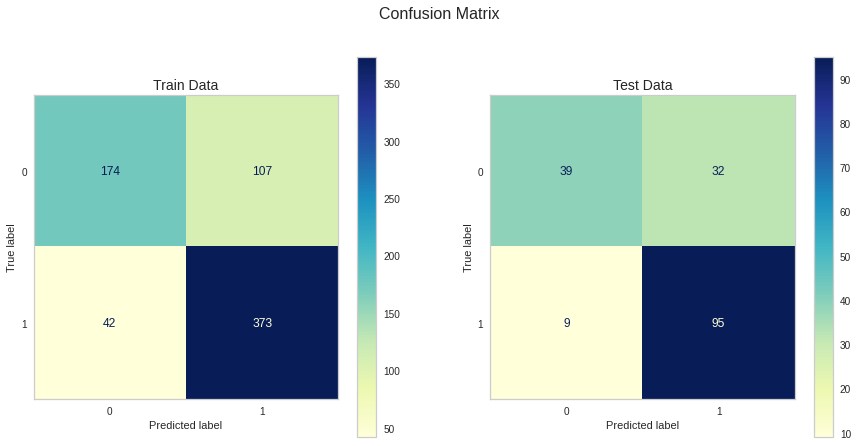

In [42]:
naive = GaussianNB()
naive.fit(x_train, y_train)

y_train_pred_count = naive.predict(x_train)
y_test_pred_count = naive.predict(x_test)

y_train_pred_proba = naive.predict_proba(x_train)
y_test_pred_proba = naive.predict_proba(x_test)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
plot_confusion_matrix(estimator = naive, X = x_train, y_true = y_train, values_format = '.7g', cmap = 'YlGnBu', ax = ax1)
plot_confusion_matrix(estimator = naive, X = x_test, y_true = y_test, values_format = '.7g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

In [43]:
model_eval(y_test,y_test_pred_count)

The accuracy of the model is :  0.7657142857142857
[[39 32]
 [ 9 95]]
              precision    recall  f1-score   support

           0       0.81      0.55      0.66        71
           1       0.75      0.91      0.82       104

    accuracy                           0.77       175
   macro avg       0.78      0.73      0.74       175
weighted avg       0.77      0.77      0.75       175



<a name = Section4.6></a>
### **4.6 Ada boosting**

In [44]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
preds_ada_train = ada.predict(x_train)
preds_ada_test = ada.predict(x_test)
print("Model evaluating for Test Data : \n")
print('------------------------------------------------------')
print(model_eval(y_test,preds_ada_test))
print('------------------------------------------------------')
print("Model evaluating for Train Data : \n")
print('------------------------------------------------------')
print(model_eval(y_train,preds_ada_train))

Model evaluating for Test Data : 

------------------------------------------------------
The accuracy of the model is :  0.9314285714285714
[[64  7]
 [ 5 99]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        71
           1       0.93      0.95      0.94       104

    accuracy                           0.93       175
   macro avg       0.93      0.93      0.93       175
weighted avg       0.93      0.93      0.93       175

None
------------------------------------------------------
Model evaluating for Train Data : 

------------------------------------------------------
The accuracy of the model is :  0.985632183908046
[[277   4]
 [  6 409]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       281
           1       0.99      0.99      0.99       415

    accuracy                           0.99       696
   macro avg       0.98      0.99      0.99       696
weighted avg     

<a name = Section4.7></a>
### **4.7 XG Boost Classifier**

In [45]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
preds_xgb_train = xgb.predict(x_train)
preds_xgb_test = xgb.predict(x_test)
print("Model evaluating for Test Data : \n")
print('------------------------------------------------------')
print(model_eval(y_test,preds_xgb_test))
print('------------------------------------------------------')
print("Model evaluating for Train Data : \n")
print('------------------------------------------------------')
print(model_eval(y_train,preds_xgb_train))

Model evaluating for Test Data : 

------------------------------------------------------
The accuracy of the model is :  0.9657142857142857
[[ 67   4]
 [  2 102]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        71
           1       0.96      0.98      0.97       104

    accuracy                           0.97       175
   macro avg       0.97      0.96      0.96       175
weighted avg       0.97      0.97      0.97       175

None
------------------------------------------------------
Model evaluating for Train Data : 

------------------------------------------------------
The accuracy of the model is :  0.9971264367816092
[[281   0]
 [  2 413]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       281
           1       1.00      1.00      1.00       415

    accuracy                           1.00       696
   macro avg       1.00      1.00      1.00       696
weighted avg

<a name = Section4.8></a>
### **4.8 GradientBoostingClassifier**

In [46]:
gbc = GradientBoostingClassifier(n_estimators=100,max_depth=7)
gbc.fit(x_train, y_train)
preds_gbc_train = gbc.predict(x_train)
preds_gbc_test = gbc.predict(x_test)
print("Model evaluating for Test Data : \n")
print('------------------------------------------------------')
print(model_eval(y_test,preds_gbc_test))
print('------------------------------------------------------')
print("Model evaluating for Train Data : \n")
print('------------------------------------------------------')
print(model_eval(y_train,preds_gbc_train))

Model evaluating for Test Data : 

------------------------------------------------------
The accuracy of the model is :  0.9371428571428572
[[ 64   7]
 [  4 100]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        71
           1       0.93      0.96      0.95       104

    accuracy                           0.94       175
   macro avg       0.94      0.93      0.93       175
weighted avg       0.94      0.94      0.94       175

None
------------------------------------------------------
Model evaluating for Train Data : 

------------------------------------------------------
The accuracy of the model is :  1.0
[[281   0]
 [  0 415]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       281
           1       1.00      1.00      1.00       415

    accuracy                           1.00       696
   macro avg       1.00      1.00      1.00       696
weighted avg       1.00    


<a name = Section5></a>
# **5. Hyperparameter Tuning** 

<a name = Section5.1></a>
### **5.1 RandomizedSearchCV With RandomForest**

In [47]:
params = {
    'max_depth':[5,10,20,30],
    'max_leaf_nodes':[16,32,64,128],
    'min_samples_leaf':[10,20,30,40,60,80]
}
rf_search_cv = RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1,random_state=42,
                                                                 class_weight='balanced'),
                                param_distributions=params,
                                 n_jobs = -1,
                                 random_state=42,
                                 scoring='roc_auc'
                                )
rf_search_cv.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20, 30],
                                        'max_leaf_nodes': [16, 32, 64, 128],
                                        'min_samples_leaf': [10, 20, 30, 40, 60,
                                                             80]},
                   random_state=42, scoring='roc_auc')

In [48]:
y_rscv_train_pred = rf_search_cv.predict(x_train)
y_rscv_test_pred = rf_search_cv.predict(x_test)

In [49]:
model_eval(y_test,y_rscv_test_pred)

The accuracy of the model is :  0.9428571428571428
[[67  4]
 [ 6 98]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        71
           1       0.96      0.94      0.95       104

    accuracy                           0.94       175
   macro avg       0.94      0.94      0.94       175
weighted avg       0.94      0.94      0.94       175



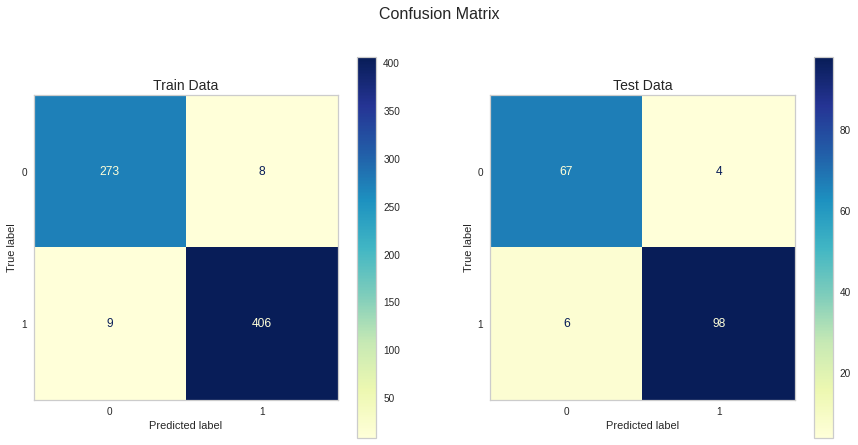

In [50]:
confus_matrix(rf_search_cv)

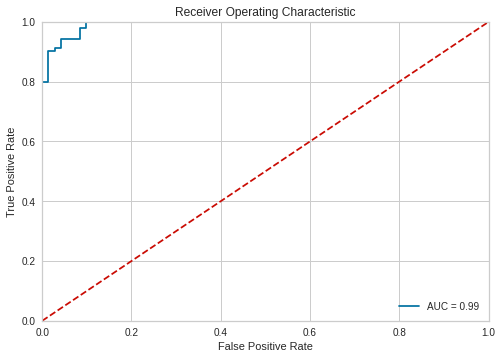

In [51]:
from sklearn import metrics

probs = rf_search_cv.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


<a name = Section5.2></a>
### **5.2 GridSearchCV with Decision Tree Classifier**

In [52]:
param_gcv = {'max_depth': [4,8,10],'min_samples_split': [2,5,10],'min_samples_leaf': [1,2,4]}

gcv = GridSearchCV(estimator = dtree,param_grid = param_gcv,cv = 5)

gcv.fit(x_train, y_train)

# Predicting training and testing labels
preds_gcv_train = gcv.predict(x_train)
preds_gcv_test = gcv.predict(x_test)
print("Model evaluating for Test Data : \n")
print('------------------------------------------------------')
print(model_eval(y_test,preds_gcv_test))
print('------------------------------------------------------')
print("Model evaluating for Train Data : \n")
print('------------------------------------------------------')
print(model_eval(y_train,preds_gcv_train))

Model evaluating for Test Data : 

------------------------------------------------------
The accuracy of the model is :  0.9257142857142857
[[ 62   9]
 [  4 100]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.91        71
           1       0.92      0.96      0.94       104

    accuracy                           0.93       175
   macro avg       0.93      0.92      0.92       175
weighted avg       0.93      0.93      0.93       175

None
------------------------------------------------------
Model evaluating for Train Data : 

------------------------------------------------------
The accuracy of the model is :  0.9899425287356322
[[278   3]
 [  4 411]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       281
           1       0.99      0.99      0.99       415

    accuracy                           0.99       696
   macro avg       0.99      0.99      0.99       696
weighted avg

<a name = Section6></a>
# **6. Tune Model With Cross Validation**

<a name = Section61></a>
### **6.1 Logistic Regression**

In [53]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10,shuffle=True,random_state=2)
modelLR = LogisticRegression()
results = model_selection.cross_val_score(modelLR, x_train, y_train, cv=kfold, scoring='accuracy')
print("10-fold cross validation average Accuracy score for Logistic Regression: %.3f" % (results.mean()))

10-fold cross validation average Accuracy score for Logistic Regression: 0.984


<a name = Section6.2></a>
### **6.2 Ada boosting**

In [54]:
score = []
for depth in [1,2,10] : 
    reg_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth))
    scores_ada = model_selection.cross_val_score(reg_ada, x, y, cv=10)
    score.append(scores_ada.mean())
print(score)

[0.8782262277951933, 0.8678944618599791, 0.7806034482758621]


<a name = Section6.3></a>
### **6.3 GradientBoosting**

In [55]:
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
model_gb = GradientBoostingClassifier(n_estimators=50, random_state=1, learning_rate = 0.10) 

results_gb = model_selection.cross_validate(model_gb, x,y, cv=10, scoring=scoring)

In [56]:
results_gb_df=pd.DataFrame.from_dict(results_gb)
results_gb_df.mean()

fit_time          0.080554
score_time        0.004713
test_accuracy     0.831100
test_precision    0.933065
test_recall       0.792270
test_f1_score     0.791112
dtype: float64

<a name = Section6.4></a>
### **6.4 XGboost classifier**

In [57]:
kfold = KFold(n_splits=10)
XGB_cv = XGBClassifier(n_estimators=100, random_state=1, learning_rate = 0.1)
results_xgb = model_selection.cross_val_score(XGB_cv, x, y, cv=kfold)

print('test accuracy: ',results_xgb.mean())

test accuracy:  0.9402690700104493


<a name = Section7></a>
# **7. Selecting Best Model**

In [58]:
model_dict = {'Logistic Model':[accuracy_score(y_test,y_lr_test_pred),f1_score(y_test,y_lr_test_pred),precision_score(y_test,y_lr_test_pred),recall_score(y_test,y_lr_test_pred)],
            'RandomizedSearchCV(RF)' : [accuracy_score(y_test,y_rscv_test_pred),f1_score(y_test,y_rscv_test_pred),precision_score(y_test,y_rscv_test_pred),recall_score(y_test,y_rscv_test_pred)],
            'Gradient Boost Model':[accuracy_score(y_test,preds_gbc_test), f1_score(y_test,preds_gbc_test),precision_score(y_test,preds_gbc_test),recall_score(y_test,preds_gbc_test)],
            'RandomForest Model':[accuracy_score(y_test,y_rf_test_pred), f1_score(y_test,y_rf_test_pred),precision_score(y_test,y_rf_test_pred),recall_score(y_test,y_rf_test_pred)],
            'Ada Boost Model':[accuracy_score(y_test,preds_ada_test), f1_score(y_test,preds_ada_test),precision_score(y_test,preds_ada_test),recall_score(y_test,preds_ada_test)],
            'DecisionTree Model':[accuracy_score(y_test,preds_dtree_test), f1_score(y_test,preds_dtree_test),precision_score(y_test,preds_dtree_test),recall_score(y_test,preds_dtree_test)],
            'XGBoost Model':[accuracy_score(y_test,preds_xgb_test), f1_score(y_test,preds_xgb_test),precision_score(y_test,preds_xgb_test),recall_score(y_test,preds_xgb_test)],
            'Naive Bayes Model':[accuracy_score(y_test,y_test_pred_count), f1_score(y_test,y_test_pred_count),precision_score(y_test,y_test_pred_count),recall_score(y_test,y_test_pred_count)],
            'GridsearchCV Model(DT)':[accuracy_score(y_test,preds_gcv_test), f1_score(y_test,preds_gcv_test),precision_score(y_test,preds_gcv_test),recall_score(y_test,preds_gcv_test)]
                                                                                                                                    
}

In [59]:
best_model = pd.DataFrame(model_dict, index=['Accuracy','F1','Precision','Recall'] ).T
print(" Model Comparision- On Test Data")
print("-------------------------------------------------")
best_model.round(2)*100

 Model Comparision- On Test Data
-------------------------------------------------


,Accuracy,F1,Precision,Recall
Logistic Model,98.0,99.0,97.0,100.0
RandomizedSearchCV(RF),94.0,95.0,96.0,94.0
Gradient Boost Model,94.0,95.0,93.0,96.0
RandomForest Model,97.0,97.0,95.0,99.0
Ada Boost Model,93.0,94.0,93.0,95.0
DecisionTree Model,91.0,92.0,91.0,94.0
XGBoost Model,97.0,97.0,96.0,98.0
Naive Bayes Model,77.0,82.0,75.0,91.0
GridsearchCV Model(DT),93.0,94.0,92.0,96.0


After building diffirent classification models and on comparing, the following conclusions are made for finalizing the best performing model:

- logistic model gave highest accuracy score(98%) compare to all models.

- The data is balanced dataset. 

- Based on the above considerations, **Logistic Classifier** is chosen as the final model .